In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## 1. K-Means Clustering

In [2]:
from sklearn.cluster import KMeans

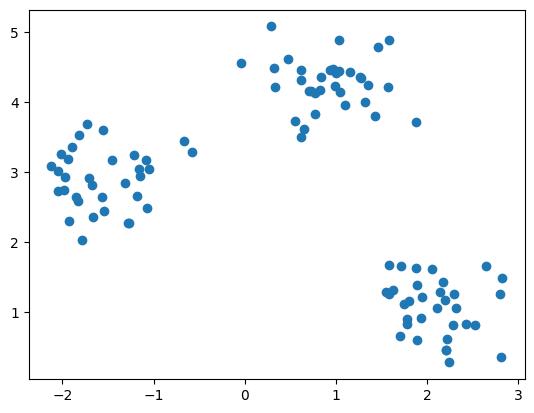

In [18]:
# Génération de données
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

-30.870531280140668

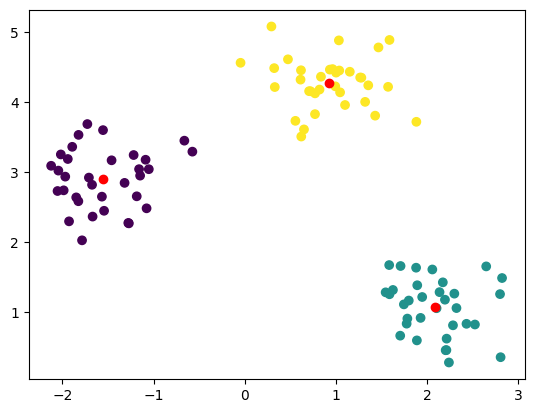

In [20]:
model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.score(X)

### Elbow Method

C'est utile pour trouver le bon nombre de cluster pour effectuer du clustering. Il faut repérer le "coude" de la fonction, c'est le niveau entre le début et la fin de la convergence, ca ressemble à un plateau intermédiaire. Ce coude permet de connaitre le nombre de cluster optimisé pour généraliser un jeu de donnée.

Si notre objectif est de réduire la fonction cout, on pourrait créer autant de cluster que de point ce qui donnerai un log loss très faible mais ce n'est pas le but.

Text(0, 0.5, 'Cout du modele (Inertia)')

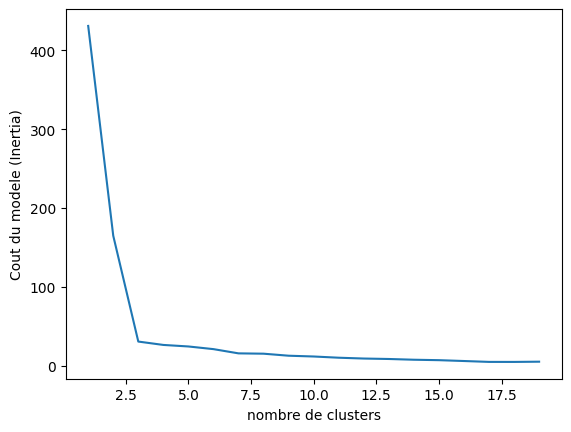

In [ ]:
inertia = [] # le cout, sa réciproque est le .score
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

## 2. Detection d'anomalies avec Isolation Forest

In [6]:
from sklearn.ensemble import IsolationForest

Cette algorithme consiste à tracer des traits, dans notre dataset aléatoire. Si le trait ne permet pas d'isoler une celle cellule, alors on continue. Plus il y a d'itération, plus le jeux de donnée ne présente pas d'anomalie et inversement.

Cela permet de détecter des anomalie. Cela renvoie des probabilités d'anomalie.
Si on a pas de chance, il se peut que les splits puissent isoler une cellule dans le groupement du dataset mais ça reste rare.

![isolation](screens/isolation_forest.png "isolation")
Pour faire face à cela, on va effectuer plusieurs algo pour discalifier les petites anomalies (en faisant la moyenne des résultats).

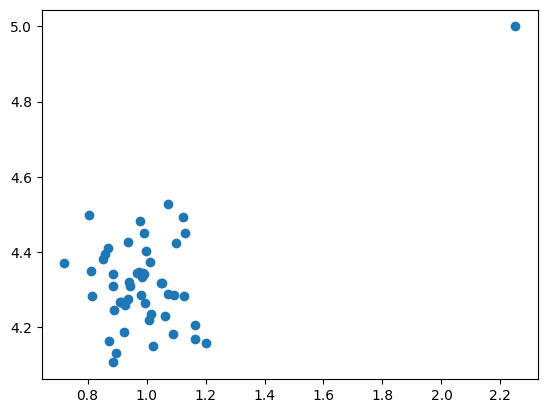

In [7]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

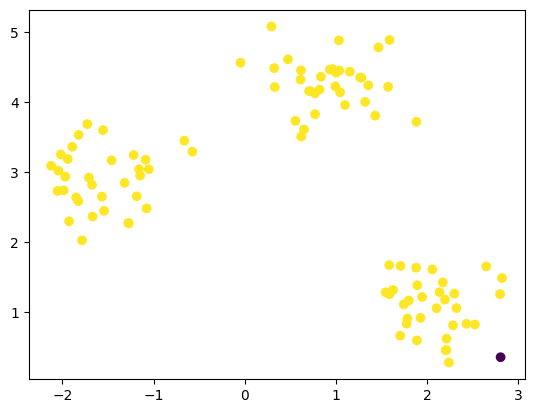

In [21]:
model = IsolationForest(contamination=0.01) # Ce paramètre revient à dire je pense qu'il y a x pourcent de déchets dans mon dataset.
model.fit(X)

plt.scatter(X[:,0], X[:, 1], c=model.predict(X))

### Application : Digits Outliers

Énorme dataset de chiffre écrits, on veut virer les outliers, les chiffres les moins bien écrit ou autrement dit, le moin reconaissable pour un model.

(1797, 64)


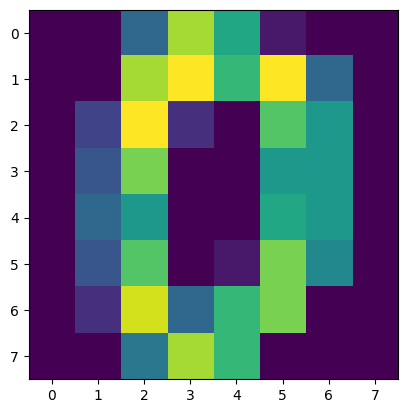

In [23]:
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

plt.imshow(images[0])
print(X.shape)

Le retour du predict de IsolationForest donne des 1 pour des non-anomalies et -1 pour des anomalies

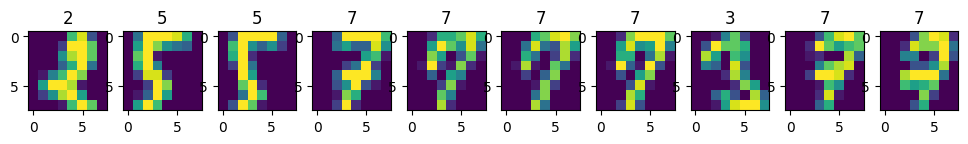

In [10]:
model = IsolationForest(random_state=0, contamination=0.02)
model.fit(X)
outliers = model.predict(X) == -1 

plt.figure(figsize=(12, 3))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

## 2. PCA : Reduction de dimension

### Visualisation 2D

In [11]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X)

PCA(n_components=2)

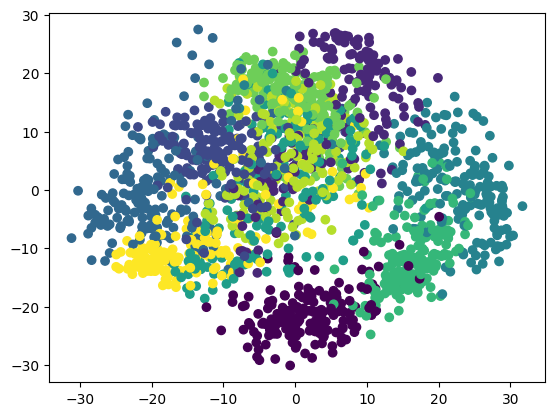

In [12]:
x_pca = model.transform(X)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)

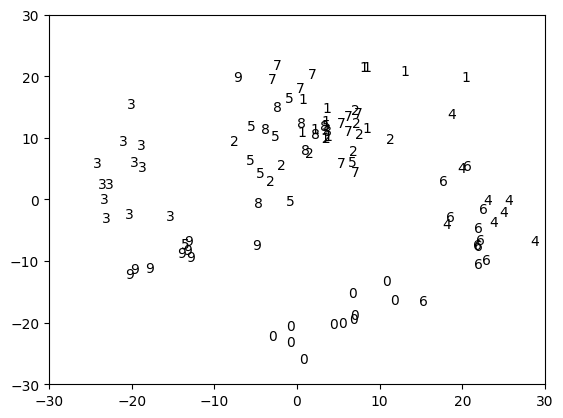

In [13]:
plt.figure()
plt.xlim(-30, 30)
plt.ylim(-30, 30)

for i in range(100):
    plt.text(x_pca[i,0], x_pca[i,1], str(y[i]))

### Compression de données

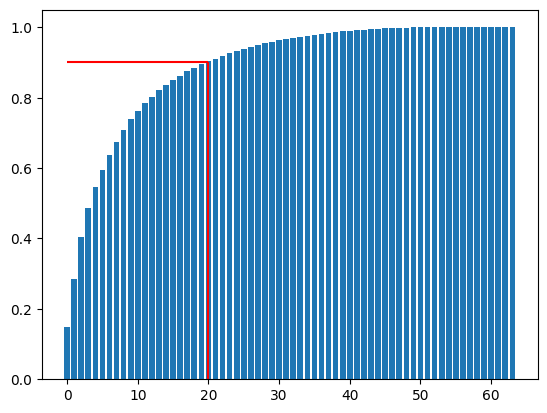

In [14]:
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)


plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')


In [15]:
model = PCA(n_components=0.99)
model.fit(X)

PCA(n_components=0.99)

Text(0.5, 1.0, 'Compressé')

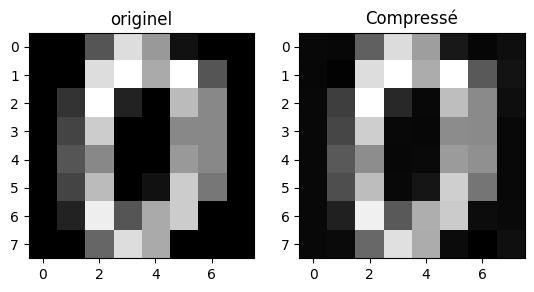

In [16]:
X_compress = model.fit_transform(X)
X_decompress = model.inverse_transform(X_compress)

plt.subplot(1, 2, 1)
plt.imshow(X[0,:].reshape((8,8)), cmap='gray')
plt.title('originel')
plt.subplot(1, 2, 2)
plt.imshow(X_decompress[0,:].reshape((8,8)), cmap='gray')
plt.title('Compressé')